<center><h1>bogaziciAI Winter Camp</h1></center>
<center><h2>Workshop 1</h2></center>

<center><h3>Grading Table</h3></center>

|             | Part 1 | Part 2      | Part 3 | General Otline      | Total |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| **Points**      | 30     | 30          | 30     | 10                  | 100   |

In [115]:
import warnings
warnings.filterwarnings('ignore')

# fundamental modules
import numpy as np
import pandas as pd

# sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# you can use for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# you can import any additional module you like

In [116]:
df = pd.read_csv('real_estate.csv')
df.head()

,No,transactiondate,houseage,distancetostation,numberofstores,latitude,longitude,housepriceofunitarea
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Task

In this task, you are expected to:

* Make a linear regression analysis.
* Use the normal equation for your linear regression analysis to verify your results.
* Make a polynomial regression analysis (You can decide on the Nth degree).

<br>
You can drop the features that you find unnecessary.
<br>
You can use sklearn module to perform your analysis.
<br> 
It is advised to explore and visualize the dataset first.

# Part 1

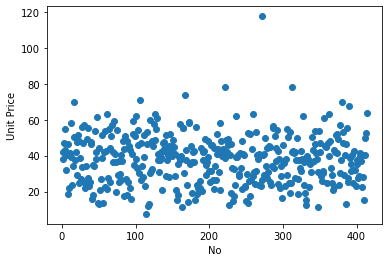

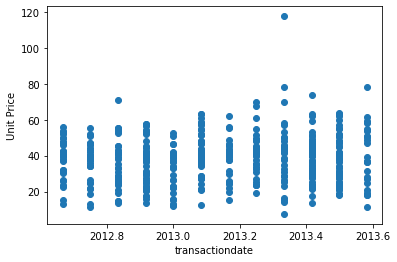

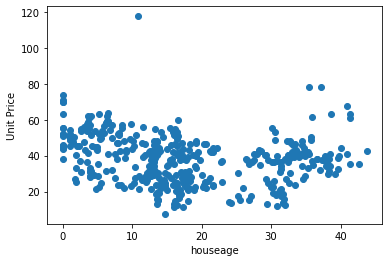

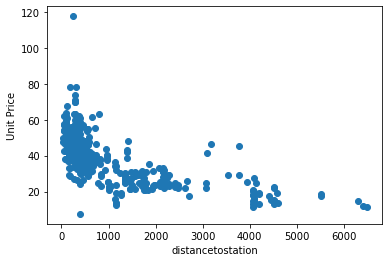

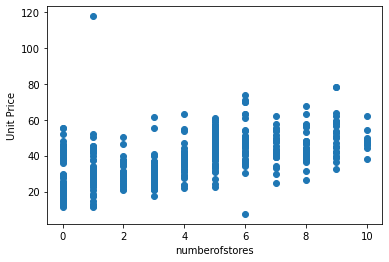

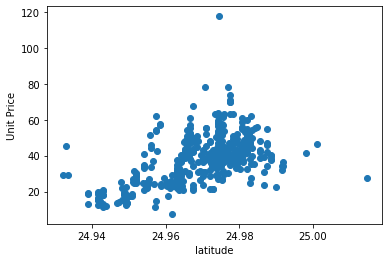

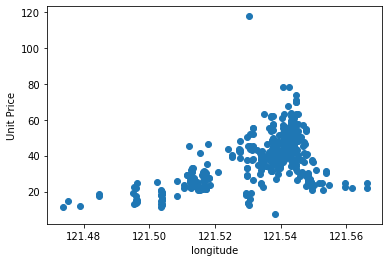

In [117]:
Linreg =LinearRegression()
x = df.drop(["housepriceofunitarea"],axis=1)
y = df["housepriceofunitarea"]
for i in x:
    plt.scatter(df[i],y)
    plt.xlabel(i)
    plt.ylabel('Unit Price')
    plt.show()

In [118]:
x.drop(['No', 'houseage'],axis=1,inplace=True)

In [119]:
Linreg.fit(x,y)
y_pred = Linreg.predict(x)
print(Linreg.coef_)
print(Linreg.intercept_)

[ 5.07959091e+00 -4.69681123e-03  1.04338982e+00  2.03373967e+02
 -1.51531898e+00]
-15081.062954959143


# Part 2

In [120]:
x_ones = np.ones(x.shape[0])
x_new = np.c_[x_ones,x]
w = np.dot(np.linalg.inv(np.dot(x_new.T,x_new)),np.dot(x_new.T,y))
print(w)
sst = np.sum((y-y.mean())**2)
ssr = np.sum((y_pred-y)**2)
r_squared = 1-ssr/sst
print(r_squared)
from sklearn import metrics
res = np.dot(x_new,w)
print(metrics.r2_score(y,res))

[-1.50810632e+04  5.07959098e+00 -4.69681122e-03  1.04338982e+00
  2.03373965e+02 -1.51531746e+00]
0.5320978525026165
0.5320978525025899


# Part 3

In [121]:
abc = PolynomialFeatures(degree=3)
x = abc.fit_transform(x)
Linreg2 = LinearRegression()
Linreg2.fit(x,y)
y_pred2 = Linreg2.predict(x)
print(metrics.r2_score(y,y_pred2))

0.6835977229256811
